<a href="https://colab.research.google.com/github/YasiruMM/Medicine-Prediction-Grp-22/blob/Out-stock-predict/OutofStock_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#Data Files Retrieving & Binding.

In [ ]:
# Load datasets
feature_file = '/content/drive/My Drive/DSGP/NoiseHandled1_MediTrack_Dataset.csv'
prediction_file = '/content/drive/My Drive/DSGP/XGBoost_Predictions.csv'

df_features = pd.read_csv(feature_file)
df_predictions = pd.read_csv(prediction_file)

# Transform the prediction columns into log scale (if not already done)
prediction_cols = ["Prediction 1", "Prediction 2", "Prediction 3", "Prediction 4", "Prediction 5", "Prediction 6"]
df_predictions[prediction_cols] = np.log1p(df_predictions[prediction_cols])

# Keep only rows where "Drug Name" exists in the predictions dataset
df_filtered = df_features[df_features["Drug Name"].isin(df_predictions["Drug Name"])]

# Merge, ensuring that predictions are duplicated across all months
df_merged = df_filtered.merge(df_predictions, on="Drug Name", how="left")

# Drop duplicate Disease Category column
df_merged.drop(columns=["Disease Category_y"], inplace=True)

# Rename column back to its original name
df_merged.rename(columns={"Disease Category_x": "Disease Category"}, inplace=True)

# Display output to check structure
from IPython.display import display
display(df_merged)

,Disease Category,Drug Category,Drug Name,Dosage,Retail Price,Purchase Price,Sales,Date,Mean Sales,CV,...,Log_Purchase_Price,Log_Sales,Log_Mean_Sales,Log_Buffer_Stock,Prediction 1,Prediction 2,Prediction 3,Prediction 4,Prediction 5,Prediction 6
0,Cardiovascular,AMLODIP,AMLODAC 5MG,5MG,2.836000e+02,3.256000e+02,54.0,2024-02-01,443.900000,41.140192,...,5.788736,4.007333,6.097850,4.897840,5.961889,5.968971,5.968971,5.968971,5.968971,5.968971
1,Diabetes,SULFON,GLIMEPRIDE (USV) 2MG,2MG,8.800000e+02,7.648481e+02,19.0,2024-02-01,66.058824,93.892687,...,6.640984,2.995732,4.205570,3.526361,3.902705,3.824329,3.820188,3.822381,3.824570,3.826754
2,Diabetes,SULFON,GLIMEPRIDE 2MG,2MG,5.440400e+03,4.690000e+03,123.0,2024-02-01,128.666667,23.042436,...,8.453401,4.820282,4.864967,3.688879,4.380103,4.191554,4.191554,4.191554,4.191554,4.191554
3,Diabetes,SULFON,GLITROL CR 60MG,60MG,8.748000e+03,1.229580e+04,56.0,2024-02-01,3992.767857,145.273975,...,9.417094,4.043051,8.292490,7.599401,7.350524,7.120401,6.813511,6.777147,7.123836,7.368933
4,Diabetes,SULFON,GLITROL CR 60MG,60MG,2.267835e+06,1.961702e+06,12345.0,2024-02-01,3992.767857,145.273975,...,14.489324,9.421087,8.292490,7.599401,7.350524,7.120401,6.813511,6.777147,7.123836,7.368933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,Cholesterol,Simvastatin,SIMVAS 10MG,10MG,4.170000e+01,3.700000e+01,49.0,2028-07-01,253.087302,167.402339,...,3.637586,3.912023,5.537678,4.852030,4.611918,4.392415,4.377962,4.360758,4.360758,4.370997
4862,Cholesterol,Simvastatin,SIMVAS 10MG,10MG,4.300000e+01,3.700000e+01,1678.0,2028-07-01,253.087302,167.402339,...,3.637586,7.425954,5.537678,4.852030,4.611918,4.392415,4.377962,4.360758,4.360758,4.370997
4863,Cholesterol,Simvastatin,ZOSTA 5MG,5MG,2.360000e+01,3.810000e+01,22.0,2028-07-01,29.407407,79.465405,...,3.666122,3.135494,3.414686,4.852030,3.763905,3.625658,3.625658,3.625658,3.621990,3.621990
4864,Cholesterol,Simvastatin,ZOSTA 5MG,5MG,2.830000e+01,3.810000e+01,10.0,2028-07-01,29.407407,79.465405,...,3.666122,2.397895,3.414686,4.852030,3.763905,3.625658,3.625658,3.625658,3.621990,3.621990


In [ ]:
# remove duplicates in merging process and finalising
df_merged = df_merged.drop_duplicates(subset=["Drug Name", "Sales", "Date"], keep="first")

# Display the updated dataframe
display(df_merged)


,Disease Category,Drug Category,Drug Name,Dosage,Retail Price,Purchase Price,Sales,Date,Mean Sales,CV,...,Log_Purchase_Price,Log_Sales,Log_Mean_Sales,Log_Buffer_Stock,Prediction 1,Prediction 2,Prediction 3,Prediction 4,Prediction 5,Prediction 6
0,Cardiovascular,AMLODIP,AMLODAC 5MG,5MG,2.836000e+02,3.256000e+02,54.0,2024-02-01,443.900000,41.140192,...,5.788736,4.007333,6.097850,4.897840,5.961889,5.968971,5.968971,5.968971,5.968971,5.968971
1,Diabetes,SULFON,GLIMEPRIDE (USV) 2MG,2MG,8.800000e+02,7.648481e+02,19.0,2024-02-01,66.058824,93.892687,...,6.640984,2.995732,4.205570,3.526361,3.902705,3.824329,3.820188,3.822381,3.824570,3.826754
2,Diabetes,SULFON,GLIMEPRIDE 2MG,2MG,5.440400e+03,4.690000e+03,123.0,2024-02-01,128.666667,23.042436,...,8.453401,4.820282,4.864967,3.688879,4.380103,4.191554,4.191554,4.191554,4.191554,4.191554
3,Diabetes,SULFON,GLITROL CR 60MG,60MG,8.748000e+03,1.229580e+04,56.0,2024-02-01,3992.767857,145.273975,...,9.417094,4.043051,8.292490,7.599401,7.350524,7.120401,6.813511,6.777147,7.123836,7.368933
4,Diabetes,SULFON,GLITROL CR 60MG,60MG,2.267835e+06,1.961702e+06,12345.0,2024-02-01,3992.767857,145.273975,...,14.489324,9.421087,8.292490,7.599401,7.350524,7.120401,6.813511,6.777147,7.123836,7.368933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,Cholesterol,Simvastatin,SIMVAS 10MG,10MG,4.170000e+01,3.700000e+01,49.0,2028-07-01,253.087302,167.402339,...,3.637586,3.912023,5.537678,4.852030,4.611918,4.392415,4.377962,4.360758,4.360758,4.370997
4862,Cholesterol,Simvastatin,SIMVAS 10MG,10MG,4.300000e+01,3.700000e+01,1678.0,2028-07-01,253.087302,167.402339,...,3.637586,7.425954,5.537678,4.852030,4.611918,4.392415,4.377962,4.360758,4.360758,4.370997
4863,Cholesterol,Simvastatin,ZOSTA 5MG,5MG,2.360000e+01,3.810000e+01,22.0,2028-07-01,29.407407,79.465405,...,3.666122,3.135494,3.414686,4.852030,3.763905,3.625658,3.625658,3.625658,3.621990,3.621990
4864,Cholesterol,Simvastatin,ZOSTA 5MG,5MG,2.830000e+01,3.810000e+01,10.0,2028-07-01,29.407407,79.465405,...,3.666122,2.397895,3.414686,4.852030,3.763905,3.625658,3.625658,3.625658,3.621990,3.621990


In [ ]:
print(df_merged.isnull().sum())
print(len(df_merged))

Disease Category      0
Drug Category         0
Drug Name             0
Dosage                0
Retail Price          0
Purchase Price        0
Sales                 0
Date                  0
Mean Sales            0
CV                    0
Buffer Percentage     0
Buffer Stock          0
Month                 0
Year                  0
Sales_LOESS_Date      0
Log_Retail_Price      0
Log_Purchase_Price    0
Log_Sales             0
Log_Mean_Sales        0
Log_Buffer_Stock      0
Prediction 1          0
Prediction 2          0
Prediction 3          0
Prediction 4          0
Prediction 5          0
Prediction 6          0
dtype: int64
3655


#Generate Loss Quantities

In [ ]:
# Assign risk factors on each disease category
loss_factors={
    'Cardiovascular':0.20, # Higher risk
    'Diabetes':0.25, # Highest risk
    'Cholesterol':0.15 # Moderate risk
}
# Assign loss factors to each drug
df_merged['Loss Factor'] = df_merged['Disease Category'].map(loss_factors).fillna(0.15)

In [ ]:
df_merged['Loss Quantity']=df_merged['Loss Factor']*df_merged['Log_Sales']
df_merged['Loss Quantity']=df_merged['Loss Quantity'].apply(lambda x: max(0,x))

In [ ]:
# drop Time related features
df_merged.drop(columns=['Date','Month','Year'],inplace=True)

In [ ]:
from google.colab import files
df_merged.to_csv('OOS_Finalized111.csv',index=False)
files.download('OOS_Finalized111.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# one hot encoding to Disease Category and Drug Name
df_merged=pd.get_dummies(df_merged,columns=['Disease Category','Drug Name'],drop_first=True)

In [ ]:
print(f"Total NaN values in Loss Quantity: {df_merged['Loss Quantity'].isna().sum()}")


Total NaN values in Loss Quantity: 0


# Downloading the OOS Dataset


In [ ]:
from google.colab import files
df_merged.to_csv('OOS_Finalized.csv',index=False)
files.download('OOS_Finalized.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Random Forest Model Evaluation

In [ ]:
# Define Random Forest model features
features = ['Sales_LOESS_Date', 'Log_Sales', 'Log_Buffer_Stock', 'Log_Retail_Price',
            'Log_Purchase_Price','Loss Quantity']+ list(df_merged.columns[df_merged.columns.str.startswith(('Disease Category_','Drug Name_'))])

targets = ['Prediction 1', 'Prediction 2', 'Prediction 3', 'Prediction 4', 'Prediction 5', 'Prediction 6']
# ------ Apply row-wise subtraction for each Prediction column ------
target_adjusted = df_merged[targets].subtract(df_merged['Loss Quantity'], axis=0)

# Update the Dataset with Target_Updated
df_merged[targets] = target_adjusted

In [ ]:
# Debug: Check the first few rows
print(target_adjusted.head())

# Verify if any NaNs still exist
print(f"NaN values in target_adjusted: {target_adjusted.isna().sum().sum()}")  # Should be 0

   Prediction 1  Prediction 2  Prediction 3  Prediction 4  Prediction 5  \
0      5.160422      5.167505      5.167505      5.167505      5.167505   
1      3.153772      3.075396      3.071255      3.073448      3.075637   
2      3.175033      2.986483      2.986483      2.986483      2.986483   
3      6.339761      6.109638      5.802748      5.766384      6.113074   
4      4.995252      4.765129      4.458239      4.421875      4.768564   

   Prediction 6  
0      5.167505  
1      3.077821  
2      2.986483  
3      6.358170  
4      5.013661  
NaN values in target_adjusted: 0


In [ ]:
# Prepare training and testing datasets
X = df_merged[features]
y = target_adjusted  # Use loss-adjusted predictions as targets
print(X.isna().sum())

# Ensure X aligns with y (drop corresponding NaN rows from X)
X = X.loc[y.index]

Sales_LOESS_Date         0
Log_Sales                0
Log_Buffer_Stock         0
Log_Retail_Price         0
Log_Purchase_Price       0
                        ..
Drug Name_ZOSTA 10MG     0
Drug Name_ZOSTA 5MG      0
Drug Name_ZYROVA 10MG    0
Drug Name_ZYROVA 20MG    0
Drug Name_ZYROVA 5MG     0
Length: 252, dtype: int64


In [ ]:
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (3655, 252), y shape: (3655, 6)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold CV

# Initialize lists to store errors
mae_list, rmse_list, r2_list = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Random Forest Model within the loop
    rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions in log scale
    y_pred_log = rf_model.predict(X_test)

    # Evaluate model performance in log scale
    mae_list.append(mean_absolute_error(y_test, y_pred_log))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred_log)))
    r2_list.append(r2_score(y_test, y_pred_log))

# Compute average performance metrics
mae_log = np.mean(mae_list)
rmse_log = np.mean(rmse_list)
r2_log = np.mean(r2_list)

print(f"Random Forest Model Performance (K-Fold CV - Log Scale):")
print(f"MAE (Log): {mae_log:.4f}")
print(f"RMSE (Log): {rmse_log:.4f}")
print(f"R² Score (Log): {r2_log:.4f}")


Random Forest Model Performance (K-Fold CV - Log Scale):
MAE (Log): 0.0734
RMSE (Log): 0.1908
R² Score (Log): 0.9778


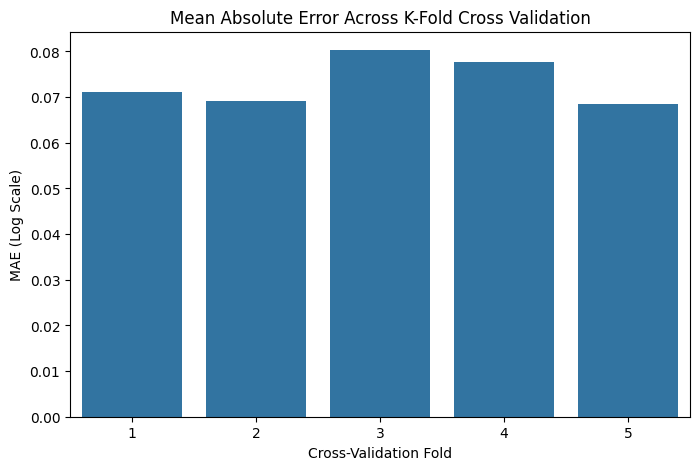

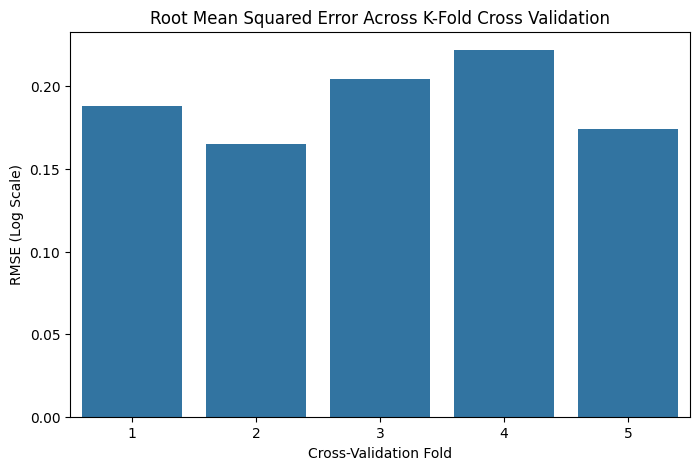

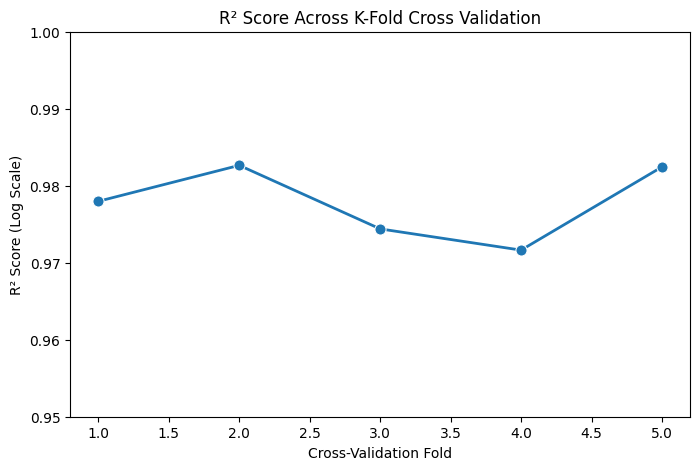

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use actual values from your cross-validation results
folds = np.arange(1, len(mae_list) + 1)

# Plot 1: MAE Across Folds
plt.figure(figsize=(8, 5))
sns.barplot(x=folds, y=mae_list)
plt.xlabel("Cross-Validation Fold")
plt.ylabel("MAE (Log Scale)")
plt.title("Mean Absolute Error Across K-Fold Cross Validation")
plt.show()

# Plot 2: RMSE Across Folds
plt.figure(figsize=(8, 5))
sns.barplot(x=folds, y=rmse_list)
plt.xlabel("Cross-Validation Fold")
plt.ylabel("RMSE (Log Scale)")
plt.title("Root Mean Squared Error Across K-Fold Cross Validation")
plt.show()

# Plot 3: R² Score Across Folds
plt.figure(figsize=(8, 5))
sns.lineplot(x=folds, y=r2_list, marker="o", linestyle="-", linewidth=2, markersize=8)
plt.xlabel("Cross-Validation Fold")
plt.ylabel("R² Score (Log Scale)")
plt.title("R² Score Across K-Fold Cross Validation")
plt.ylim(0.95, 1)  # Adjust scale for better visibility
plt.show()


# Saving the trained model for Future Usage

In [ ]:
import joblib
rf_model_path="/content/drive/MyDrive/DSGP/RandomForest_OOS.pkl"
joblib.dump(rf_model, rf_model_path)

['/content/drive/MyDrive/DSGP/RandomForest_OOS.pkl']

In [ ]:
import os
os.path.exists("/content/drive/My Drive/DSGP/RandomForest_OOS.pkl")


True

In [ ]:
print(os.listdir("/content/drive/My Drive/DSGP/"))

['Structured_CardiovascularFINAL_Data.xlsx', 'Updated2_CardioDATA.csv', 'cardi_DUPLI_Handle.csv', 'Name_Handle.csv', 'cardi_DUPLICATION_Handle.csv', 'outlierProcessed.csv', 'Finalised_Cardio_Data.csv', 'updated_outlierProcessed.csv', 'MediTrackData.csv', 'updated_MediTrack_Dataset.csv', 'NoiseHandled1_MediTrack_Dataset.csv', 'XGBoost_Predictions.csv', 'RandomForest_OOS.pkl']
